## Time Series forecasting with Tensorflow

## Get Data

use data from coindesk

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-05 15:15:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-04-05 15:15:08 (73.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                  parse_dates=["Date"],
                  index_col=["Date"]) # parse the date column and tell pandas it is a Date
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
# Only want closing price each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'BTC Price')

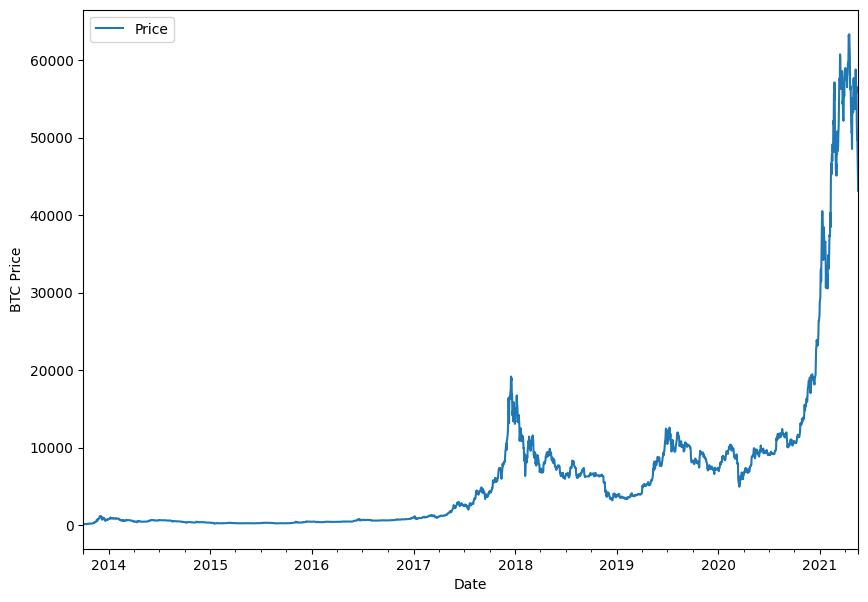

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")

## Import time series data with Python's CSV Module

In [ ]:
# Importing and fromating historical Bitcoin's data with Python
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skip first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))


timesteps[:10], btc_price[:10]



([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

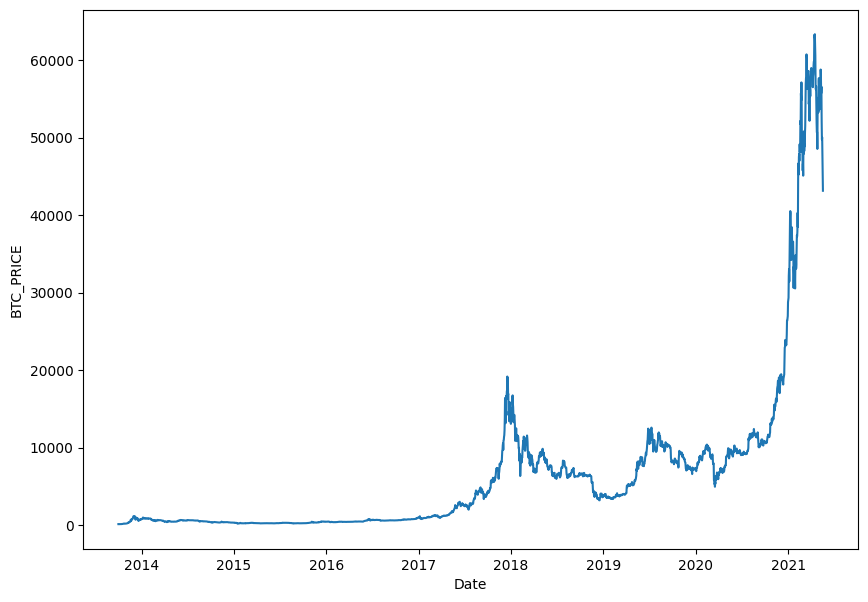

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC_PRICE")
plt.xlabel("Date")


## Format data part 1 :Create train test sets of our series data

### Creating train and test data with time series data (The Wrong Way)

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                    prices,
                                    test_size=0.2,
                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

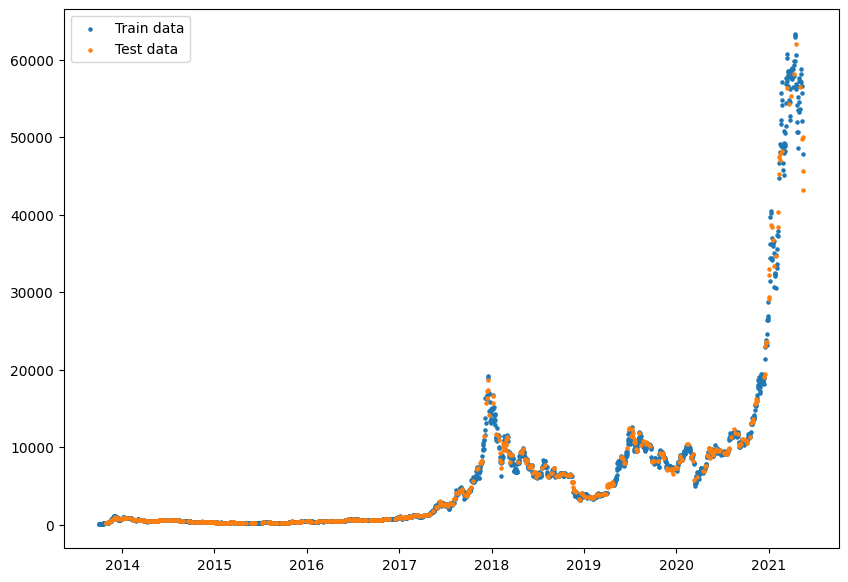

In [ ]:
#Let's Plot wrong train and test split
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, s=5,label="Train data")
plt.scatter(X_test,y_test, s=5,label="Test data")
plt.legend()
plt.show()

### Create train and test split for time Series (The Right Way)

In [ ]:
# create train and test splits the right way for time series data
split_size = int(0.8 * len(prices))

#Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

#Create train data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

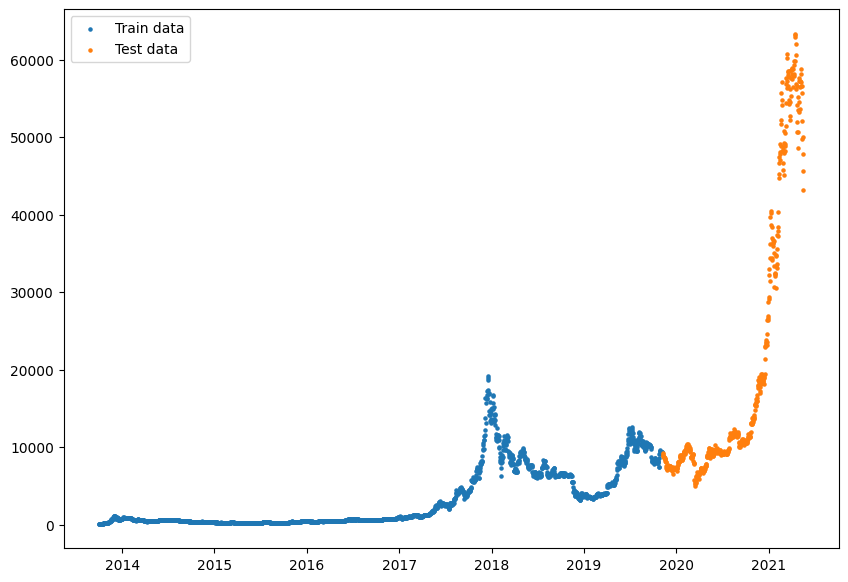

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, s=5,label="Train data")
plt.scatter(X_test,y_test, s=5,label="Test data")
plt.legend()
plt.show()

## Create a plotting function

In [ ]:
# create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

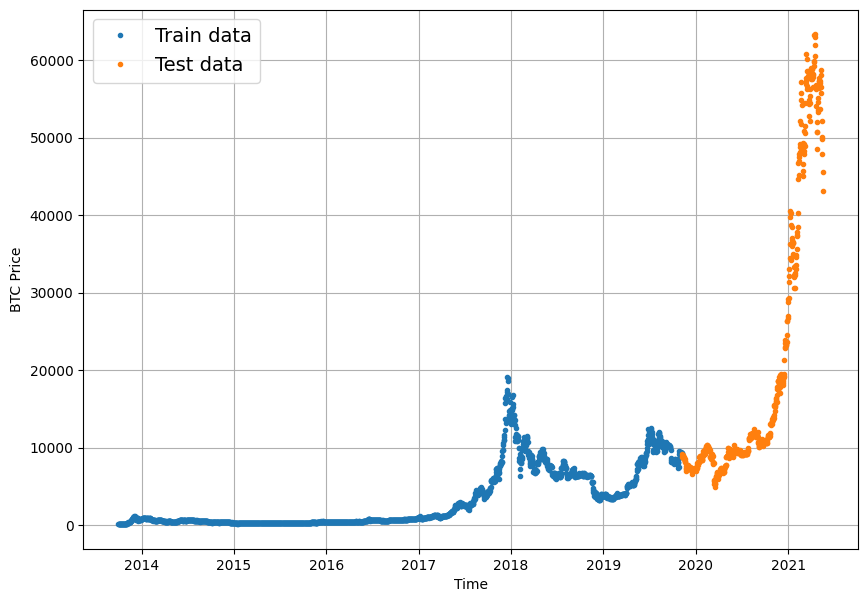

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(X_train,y_train,label="Train data")
plot_time_series(X_test,y_test,label="Test data")


## Modelling Experiments

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

* horizon = number of timesteps to predict into future
* window = number of timesteps from past used to predict horizon
For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?

Model Number	Model Type	Horizon size	Window size	Extra data
* 0	Naïve model (baseline)	NA	NA	NA
* 1	Dense model	1	7	NA
* 2	Same as 1	1	30	NA
* 3	Same as 1	7	30	NA
* 4	Conv1D	1	7	NA
* 5	LSTM	1	7	NA
* 6	Same as 1 (but with multivariate data)	1	7	Block reward size
* 7	N-BEATs Algorithm	1	7	NA
* 8	Ensemble (multiple models optimized on different loss functions)	1	7	NA
* 9	Future prediction model (model to predict future values)	1	7	NA
* 10	Same as 1 (but with turkey 🦃 data introduced)	1	7	NA

## Model 0 : Navie Forecast (baseline) 

The formula looks like this:

$$\hat{y}_{t} = y-{t-1}$$

In English : 

  the prediction at timestamp (y-hat) is equal to the value at timetamp t-1(previous timetamp) -this is for a horizon of 1

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

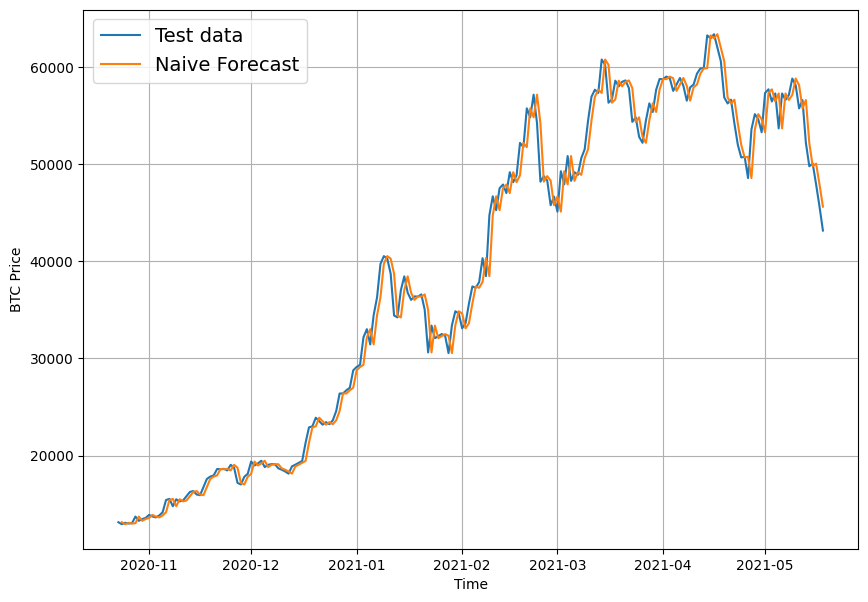

In [ ]:
plt.figure(figsize=(10,7))
#plot_time_series(X_train,y_train, label="Train data")
plot_time_series(X_test,y_test, start=350,label="Test data", format="-")
plot_time_series(X_test[1:],naive_forecast, start=350, format="-", label="Naive Forecast")


## Evaluating a time series model

We're predicting a number, so that means we have a form of a regression problem

regression metrices
* MAE
* MSE
* RMSE 
* MAPE (not recommended)
* MASE (recommended)


In [ ]:
import tensorflow as tf

In [ ]:
# MASE Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE
  """
  mae= tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season= tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:],naive_forecast).numpy()

0.9995699939182624

In [ ]:
from keras.metrics.regression_metrics import mean_absolute_error
# Create a function to take model prediction and truth values and return evalutaion metrics
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rsme = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae" : mae.numpy(),
      "mse" : mse.numpy(),
      "rsme" : rsme.numpy(),
      "mape" : mape.numpy(),
      "mase" : mase.numpy()
  }

In [ ]:
naive_results = evaluate_preds(y_test[1:],
                               naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Data Part 2 : Windowing our dataset

why window ?

we window our time series dataset to turn our data into a supervised learning problem

```
Window for one week

[0,1,2,3,4,5,6] ==> [7]

[1,2,3,4,5,6,7] ==> [8]

[2,3,4,5,6,7,8] ==> [9]

In [ ]:
# What we want to do with our bitcoin data
print(f"We want to use : {btc_price[:7]} to predict this : {btc_price[7]}")

We want to use : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this : 123.033


In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
HORIZON = 1 #predict next one day
WINDOW_SIZE = 7 #use the past week of Bitcoin data to make the prediction

In [ ]:
# Create Function to label windowed data
def get_labeled_window(x, horizon=HORIZON):
  """
  Creates lables for windowed dataset

  E.g. horizon=1
  Input : [0,1,2,3,4,5,6] ==>Output : [7]
  """
  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
test_window, test_label = get_labeled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

**Note** We've got a way to label our windowed data

However, this only works on a small scale

we could do this with our whole data

we can do this with python for loop, but this takes a long time

* So using `numpy array's indexing`


In [ ]:
# Create function to view Numpy arrays as windows
import numpy as np
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into 2D array of sequential labelled of window_size 
  """
  window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)

  windows_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T

  windowed_array = x[windows_indexes]
  windows, labels = get_labeled_window(windowed_array,horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
#View the first 3
for i in range(3):
  print(f"Window : {full_windows[i]} --> Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Label : [125.96116]


There is function which does similar to the above in tf.keras.preprocessing

## Turning windows into Train and Test

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

## Make a modelling checkpoint

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1 : Dense Model(window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs
Why these values?

I picked them out of experimentation.

Hyperparameters = values a machine learning practitioner (you!) can adjust themselves
Parameters = values a model learns on its own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_1.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2403.2568 - mae: 2403.2568 - mse: 14996829.0000  

18/18 [==============================] - 10s 183ms/step - loss: 1624.8226 - mae: 1624.8226 - mse: 9134551.0000 - val_loss: 2974.6748 - val_mae: 2974.6748 - val_mse: 19355538.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 414.3728 - mae: 414.3728 - mse: 638506.8750 

18/18 [==============================] - 1s 72ms/step - loss: 410.9204 - mae: 410.9204 - mse: 628160.3750 - val_loss: 1791.6082 - val_mae: 1791.6082 - val_mse: 7449992.5000
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 214.7211 - mae: 214.7211 - mse: 219071.0781

18/18 [==============================] - 1s 67ms/step - loss: 207.6039 - mae: 207.6039 - mse: 206219.6094 - val_loss: 1255.5022 - val_mae: 1255.5022 - val_mse: 4135857.7500
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 180.9931 - mae: 180.9931 - mse: 171733.9375

18/18 [==============================] - 1s 80ms/step - loss: 172.9881 - mae: 172.9881 - mse: 155106.0312 - val_loss: 897.9948 - val_mae: 897.9948 - val_mse: 2683685.2500
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 169.1009 - mae: 169.1009 - mse: 155693.3906

18/18 [==============================] - 1s 55ms/step - loss: 161.2708 - mae: 161.2708 - mse: 139636.0156 - val_loss: 889.2802 - val_mae: 889.2802 - val_mse: 2554064.5000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 159.6987 - mae: 159.6987 - mse: 135759.2656

18/18 [==============================] - 1s 81ms/step - loss: 159.6987 - mae: 159.6987 - mse: 135759.2656 - val_loss: 871.8950 - val_mae: 871.8950 - val_mse: 2447706.7500
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 158.5000 - mae: 158.5000 - mse: 141741.9531

18/18 [==============================] - 1s 64ms/step - loss: 155.1939 - mae: 155.1939 - mse: 130116.2266 - val_loss: 838.5469 - val_mae: 838.5469 - val_mse: 2368807.2500
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 149.8457 - mae: 149.8457 - mse: 124376.0547

18/18 [==============================] - 1s 55ms/step - loss: 150.2731 - mae: 150.2731 - mse: 123530.9375 - val_loss: 821.3448 - val_mae: 821.3448 - val_mse: 2277893.2500
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 152.7249 - mae: 152.7249 - mse: 124213.5703

18/18 [==============================] - 1s 65ms/step - loss: 150.4490 - mae: 150.4490 - mse: 122613.9844 - val_loss: 807.6142 - val_mae: 807.6142 - val_mse: 2141580.5000
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 141.0650 - mae: 141.0650 - mse: 105041.5000

18/18 [==============================] - 2s 91ms/step - loss: 147.3061 - mae: 147.3061 - mse: 119129.3750 - val_loss: 792.6684 - val_mae: 792.6684 - val_mse: 2055905.3750
Epoch 11/100
18/18 [==============================] - 0s 16ms/step - loss: 143.1456 - mae: 143.1456 - mse: 112247.5859 - val_loss: 793.6422 - val_mae: 793.6422 - val_mse: 2011439.8750
Epoch 12/100
18/18 [==============================] - 0s 20ms/step - loss: 139.7513 - mae: 139.7513 - mse: 109007.5781 - val_loss: 811.8512 - val_mae: 811.8512 - val_mse: 2030851.5000
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 140.7774 - mae: 140.7774 - mse: 109228.9609

18/18 [==============================] - 2s 93ms/step - loss: 140.4796 - mae: 140.4796 - mse: 108163.5312 - val_loss: 780.3310 - val_mae: 780.3310 - val_mse: 1918091.2500
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 136.7425 - mae: 136.7425 - mse: 106858.1328

18/18 [==============================] - 1s 85ms/step - loss: 135.3788 - mae: 135.3788 - mse: 103534.0000 - val_loss: 734.4254 - val_mae: 734.4254 - val_mse: 1790004.5000
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 138.1974 - mae: 138.1974 - mse: 102135.3125 - val_loss: 740.5798 - val_mae: 740.5798 - val_mse: 1774665.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 118.6010 - mae: 118.6010 - mse: 63315.8672

18/18 [==============================] - 1s 32ms/step - loss: 131.0747 - mae: 131.0747 - mse: 97289.1406 - val_loss: 720.0464 - val_mae: 720.0464 - val_mse: 1711013.7500
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 129.5205 - mae: 129.5205 - mse: 96293.4844 - val_loss: 738.3157 - val_mae: 738.3157 - val_mse: 1735298.0000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 147.7337 - mae: 147.7337 - mse: 111194.9688

18/18 [==============================] - 1s 32ms/step - loss: 129.0631 - mae: 129.0631 - mse: 94862.2266 - val_loss: 689.3613 - val_mae: 689.3613 - val_mse: 1635405.6250
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 129.9843 - mae: 129.9843 - mse: 95078.7734 - val_loss: 738.6625 - val_mae: 738.6625 - val_mse: 1716409.2500
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 128.3528 - mae: 128.3528 - mse: 93137.0781 - val_loss: 742.0829 - val_mae: 742.0829 - val_mse: 1719693.3750
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 129.1856 - mae: 129.1856 - mse: 91476.5625

18/18 [==============================] - 1s 32ms/step - loss: 129.1856 - mae: 129.1856 - mse: 91476.5625 - val_loss: 674.6373 - val_mae: 674.6373 - val_mse: 1566941.7500
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 187.2909 - mae: 187.2909 - mse: 189397.6562

18/18 [==============================] - 1s 31ms/step - loss: 126.9546 - mae: 126.9546 - mse: 92493.5469 - val_loss: 671.0544 - val_mae: 671.0544 - val_mse: 1524710.1250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 134.5833 - mae: 134.5833 - mse: 81387.2344

18/18 [==============================] - 1s 32ms/step - loss: 125.2158 - mae: 125.2158 - mse: 89482.6562 - val_loss: 657.9088 - val_mae: 657.9088 - val_mse: 1495724.2500
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 123.5483 - mae: 123.5483 - mse: 89191.4844

18/18 [==============================] - 1s 31ms/step - loss: 123.5483 - mae: 123.5483 - mse: 89191.4844 - val_loss: 653.9537 - val_mae: 653.9537 - val_mse: 1475474.3750
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 123.6163 - mae: 123.6163 - mse: 87405.9609 - val_loss: 663.7772 - val_mae: 663.7772 - val_mse: 1480757.0000
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 125.6442 - mae: 125.6442 - mse: 67845.2500

18/18 [==============================] - 1s 30ms/step - loss: 122.4565 - mae: 122.4565 - mse: 86253.2266 - val_loss: 649.3768 - val_mae: 649.3768 - val_mse: 1462892.8750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 176.0013 - mae: 176.0013 - mse: 153209.6250

18/18 [==============================] - 1s 31ms/step - loss: 124.1199 - mae: 124.1199 - mse: 87802.9453 - val_loss: 641.2650 - val_mae: 641.2650 - val_mse: 1424726.7500
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 123.1317 - mae: 123.1317 - mse: 85705.1328 - val_loss: 644.8411 - val_mae: 644.8411 - val_mse: 1418987.5000
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4322 - mae: 119.4322 - mse: 83838.1484 - val_loss: 686.1127 - val_mae: 686.1127 - val_mse: 1511660.6250
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 142.4693 - mae: 142.4693 - mse: 96002.2266

18/18 [==============================] - 1s 31ms/step - loss: 126.6536 - mae: 126.6536 - mse: 87694.9688 - val_loss: 632.0438 - val_mae: 632.0438 - val_mse: 1386087.3750
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 124.2665 - mae: 124.2665 - mse: 83297.3672 - val_loss: 702.1422 - val_mae: 702.1422 - val_mse: 1544801.0000
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 124.5361 - mae: 124.5361 - mse: 91333.4531

18/18 [==============================] - 1s 32ms/step - loss: 121.1254 - mae: 121.1254 - mse: 85609.4062 - val_loss: 625.3030 - val_mae: 625.3030 - val_mse: 1366156.7500
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 119.9336 - mae: 119.9336 - mse: 82792.0547 - val_loss: 679.5117 - val_mae: 679.5117 - val_mse: 1477155.6250
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 120.1537 - mae: 120.1537 - mse: 83528.0938 - val_loss: 640.4532 - val_mae: 640.4532 - val_mse: 1406077.2500
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 119.1706 - mae: 119.1706 - mse: 86455.2656

18/18 [==============================] - 1s 31ms/step - loss: 117.1834 - mae: 117.1834 - mse: 81106.5000 - val_loss: 618.4376 - val_mae: 618.4376 - val_mse: 1339501.8750
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 161.6497 - mae: 161.6497 - mse: 136505.8281

18/18 [==============================] - 1s 32ms/step - loss: 123.4321 - mae: 123.4321 - mse: 83947.0547 - val_loss: 617.8578 - val_mae: 617.8578 - val_mse: 1336901.1250
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 120.7361 - mae: 120.7361 - mse: 83993.2969 - val_loss: 618.3712 - val_mae: 618.3712 - val_mse: 1337767.1250
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 118.7615 - mae: 118.7615 - mse: 81143.0703 - val_loss: 639.3742 - val_mae: 639.3742 - val_mse: 1393758.7500
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 130.9145 - mae: 130.9145 - mse: 136041.1250

18/18 [==============================] - 1s 36ms/step - loss: 116.7326 - mae: 116.7326 - mse: 79940.4922 - val_loss: 610.7229 - val_mae: 610.7229 - val_mse: 1308925.7500
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 116.2036 - mae: 116.2036 - mse: 78282.1562 - val_loss: 611.2619 - val_mae: 611.2619 - val_mse: 1311393.6250
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 115.8759 - mae: 115.8759 - mse: 78447.2422 - val_loss: 618.6987 - val_mae: 618.6987 - val_mse: 1329950.2500
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1935 - mae: 117.1935 - mse: 80650.1562 - val_loss: 641.0018 - val_mae: 641.0018 - val_mse: 1353136.0000
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 115.8725 - mae: 115.8725 - mse: 76933.8672 - val_loss: 655.8089 - val_mae: 655.8089 - val_mse: 1422854.7500
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 115.0054 - mae: 115.0054 - mse: 

18/18 [==============================] - 1s 62ms/step - loss: 116.7051 - mae: 116.7051 - mse: 78822.7734 - val_loss: 602.0955 - val_mae: 602.0955 - val_mse: 1277720.6250
Epoch 45/100
18/18 [==============================] - 0s 9ms/step - loss: 113.4332 - mae: 113.4332 - mse: 77556.7344 - val_loss: 622.9780 - val_mae: 622.9780 - val_mse: 1335185.0000
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5267 - mae: 115.5267 - mse: 77075.6953 - val_loss: 614.3830 - val_mae: 614.3830 - val_mse: 1287546.0000
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 118.5741 - mae: 118.5741 - mse: 79913.3047 - val_loss: 648.7843 - val_mae: 648.7843 - val_mse: 1362899.6250
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1773 - mae: 115.1773 - mse: 79186.1016 - val_loss: 640.8610 - val_mae: 640.8610 - val_mse: 1342753.1250
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2730 - mae: 115.2730 - m

18/18 [==============================] - 1s 33ms/step - loss: 123.3543 - mae: 123.3543 - mse: 82074.6484 - val_loss: 593.9396 - val_mae: 593.9396 - val_mse: 1253988.3750
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8128 - mae: 114.8128 - mse: 78203.4844 - val_loss: 597.1321 - val_mae: 597.1321 - val_mse: 1249957.5000
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8061 - mae: 116.8061 - mse: 79502.5469 - val_loss: 594.2177 - val_mae: 594.2177 - val_mse: 1252677.5000
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9849 - mae: 115.9849 - mse: 78189.1094 - val_loss: 674.6298 - val_mae: 674.6298 - val_mse: 1419015.8750
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 117.6462 - mae: 117.6462 - mse: 77219.8672 - val_loss: 594.6694 - val_mae: 594.6694 - val_mse: 1244129.0000
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 124.6662 - mae: 124.6662 - mse: 

18/18 [==============================] - 1s 31ms/step - loss: 121.0844 - mae: 121.0844 - mse: 82348.6562 - val_loss: 592.9910 - val_mae: 592.9910 - val_mse: 1249742.7500
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6052 - mae: 116.6052 - mse: 77944.5547 - val_loss: 806.6354 - val_mae: 806.6354 - val_mse: 1892737.3750
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 132.9689 - mae: 132.9689 - mse: 90829.1016 - val_loss: 756.7271 - val_mae: 756.7271 - val_mse: 1710355.7500
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8964 - mae: 120.8964 - mse: 78459.5156 - val_loss: 606.5225 - val_mae: 606.5225 - val_mse: 1261933.5000
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2698 - mae: 113.2698 - mse: 75360.8750 - val_loss: 637.6904 - val_mae: 637.6904 - val_mse: 1353309.7500
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5569 - mae: 112.5569 - m

18/18 [==============================] - 1s 34ms/step - loss: 112.9282 - mae: 112.9282 - mse: 74755.6562 - val_loss: 588.2413 - val_mae: 588.2413 - val_mse: 1222473.6250
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6818 - mae: 110.6818 - mse: 73821.6719 - val_loss: 601.3289 - val_mae: 601.3289 - val_mse: 1242399.2500
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4488 - mae: 111.4488 - mse: 74045.3281 - val_loss: 604.7626 - val_mae: 604.7626 - val_mse: 1248574.6250
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7726 - mae: 112.7726 - mse: 74986.8828 - val_loss: 644.6511 - val_mae: 644.6511 - val_mse: 1362233.8750
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8550 - mae: 113.8550 - mse: 72163.7578 - val_loss: 657.9400 - val_mae: 657.9400 - val_mse: 1391755.5000
Epoch 69/100
18/18 [==============================] - ETA: 0s - loss: 125.6693 - mae: 125.6693 - mse: 

18/18 [==============================] - 1s 31ms/step - loss: 125.6693 - mae: 125.6693 - mse: 82208.8047 - val_loss: 582.1166 - val_mae: 582.1166 - val_mse: 1215581.7500
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 128.1656 - mae: 128.1656 - mse: 85682.7812 - val_loss: 606.0505 - val_mae: 606.0505 - val_mse: 1250307.1250
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 119.5611 - mae: 119.5611 - mse: 77036.0469 - val_loss: 589.4618 - val_mae: 589.4618 - val_mse: 1222118.8750
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 95.7425 - mae: 95.7425 - mse: 75682.9375

18/18 [==============================] - 1s 32ms/step - loss: 111.7100 - mae: 111.7100 - mse: 75515.1719 - val_loss: 581.2245 - val_mae: 581.2245 - val_mse: 1210227.0000
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6608 - mae: 108.6608 - mse: 72270.2031 - val_loss: 583.0824 - val_mae: 583.0824 - val_mse: 1217836.3750
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5155 - mae: 111.5155 - mse: 74508.2969 - val_loss: 610.6265 - val_mae: 610.6265 - val_mse: 1272581.8750
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3703 - mae: 111.3703 - mse: 74418.8672 - val_loss: 595.4755 - val_mae: 595.4755 - val_mse: 1226343.6250
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 79.4513 - mae: 79.4513 - mse: 28013.8086

18/18 [==============================] - 1s 31ms/step - loss: 112.3904 - mae: 112.3904 - mse: 75014.2812 - val_loss: 577.1637 - val_mae: 577.1637 - val_mse: 1195622.8750
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3889 - mae: 110.3889 - mse: 72493.3516 - val_loss: 578.4015 - val_mae: 578.4015 - val_mse: 1197389.2500
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3805 - mae: 114.3805 - mse: 74389.6953 - val_loss: 578.2684 - val_mae: 578.2684 - val_mse: 1202621.0000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9029 - mae: 110.9029 - mse: 75360.9531 - val_loss: 597.8878 - val_mae: 597.8878 - val_mse: 1244199.5000
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7605 - mae: 110.7605 - mse: 74233.4453 - val_loss: 620.3760 - val_mae: 620.3760 - val_mse: 1273418.2500
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 97.1121 - mae: 97.1121 - mse: 41

18/18 [==============================] - 1s 31ms/step - loss: 109.9083 - mae: 109.9083 - mse: 73299.6172 - val_loss: 576.5472 - val_mae: 576.5472 - val_mse: 1196444.3750
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 190.6826 - mae: 190.6826 - mse: 230758.2188

18/18 [==============================] - 1s 31ms/step - loss: 120.1142 - mae: 120.1142 - mse: 80796.2578 - val_loss: 574.2442 - val_mae: 574.2442 - val_mse: 1189732.2500
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 117.5000 - mae: 117.5000 - mse: 78643.8750 - val_loss: 650.2643 - val_mae: 650.2643 - val_mse: 1361306.2500
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6890 - mae: 115.6890 - mse: 74482.3828 - val_loss: 645.8463 - val_mae: 645.8463 - val_mse: 1358211.7500
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9069 - mae: 109.9069 - mse: 72641.5938 - val_loss: 589.7913 - val_mae: 589.7913 - val_mse: 1210516.8750
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6479 - mae: 109.6479 - mse: 71438.6172 - val_loss: 593.6514 - val_mae: 593.6514 - val_mse: 1217315.8750
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0619 - mae: 109.0619 - m

18/18 [==============================] - 1s 30ms/step - loss: 109.7976 - mae: 109.7976 - mse: 72325.5234 - val_loss: 573.6629 - val_mae: 573.6629 - val_mse: 1185064.0000
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4440 - mae: 113.4440 - mse: 74926.8906 - val_loss: 640.2931 - val_mae: 640.2931 - val_mse: 1333411.1250
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 123.7730 - mae: 123.7730 - mse: 80511.6016 - val_loss: 663.8951 - val_mae: 663.8951 - val_mse: 1399324.5000
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8995 - mae: 112.8995 - mse: 74795.0625 - val_loss: 611.0641 - val_mae: 611.0641 - val_mse: 1248227.6250
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3414 - mae: 107.3414 - mse: 69063.6641 - val_loss: 586.1899 - val_mae: 586.1899 - val_mse: 1212271.7500
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6717 - mae: 107.6717 - m

18/18 [==============================] - 1s 31ms/step - loss: 110.8672 - mae: 110.8672 - mse: 72666.3594 - val_loss: 571.1637 - val_mae: 571.1637 - val_mse: 1177054.6250
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3010 - mae: 114.3010 - mse: 71975.8750 - val_loss: 665.0749 - val_mae: 665.0749 - val_mse: 1362764.2500


In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 665.0750 - mae: 665.0750 - mse: 1362764.5000


[665.074951171875, 665.074951171875, 1362764.5]

In [ ]:
# Load in saved best perfoming model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.1638 - mae: 571.1638 - mse: 1177054.2500


[571.163818359375, 571.163818359375, 1177054.25]

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Make forecast with a model(on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

* Take in a train model
* Takes in some input data (same kind of data the model was trained on)
* Passes the input data to the model's predict() method
* Returns the predictions

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make prediction using model_1 
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8852.226, 8737.448, 9006.102, 8794.191, 8709.781, 8741.538,
        8661.717, 8517.698, 8441.331, 8510.388], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_1_preds)
model_1_results

{'mae': 571.16376,
 'mse': 1177054.2,
 'rsme': 1084.9213,
 'mape': 2.5683558,
 'mase': 1.0033765}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

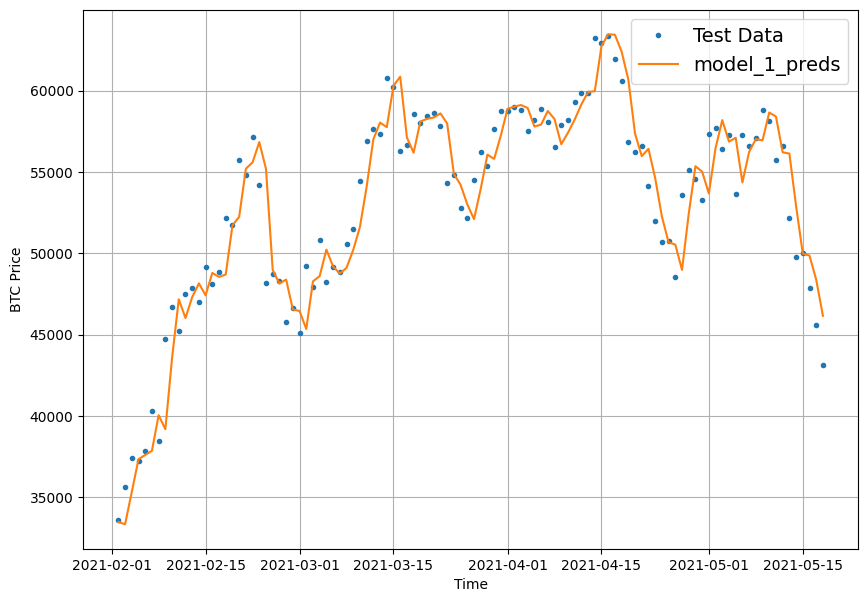

In [ ]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

## Model 2 : Dense(Window = 30, Horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make window data with appropriate horizon and windowss sizes
full_windows , full_lables = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_lables)

(2757, 2757)

In [ ]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_lables)
len(train_windows),len(test_windows)

(2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name="model_2_dense")

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_2.name)])

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 613.8228 - mae: 613.8228 - mse: 1287173.7500


[613.8228149414062, 613.8228149414062, 1287173.75]

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 613.4875 - mae: 613.4875 - mse: 1284892.0000


[613.487548828125, 613.487548828125, 1284892.0]

In [ ]:
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 613.4875,
 'mse': 1284892.0,
 'rsme': 1133.5308,
 'mape': 2.7756355,
 'mase': 1.0723822}

In [ ]:
model_1_results

{'mae': 571.16376,
 'mse': 1177054.2,
 'rsme': 1084.9213,
 'mape': 2.5683558,
 'mase': 1.0033765}

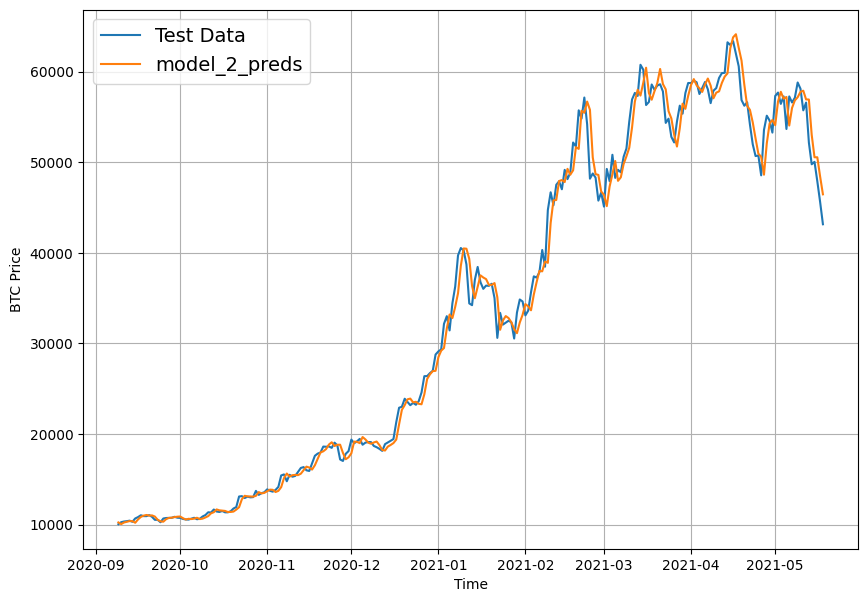

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3 : Dense (Window =30 , horizon =7)

In [ ]:

HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)
     

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1389.4376


1389.4376220703125

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1236.5159


1236.515869140625

In [ ]:

# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9326.805, 9545.534, 9440.787, 9453.345, 9544.819, 9613.41 ,
        9540.679],
       [9085.99 , 9092.831, 9020.34 , 9064.392, 9210.849, 9194.092,
        9294.725],
       [8937.188, 8928.121, 8937.23 , 9131.818, 9372.642, 9158.858,
        9153.308],
       [8992.116, 9098.196, 9110.98 , 9173.407, 9420.209, 9261.322,
        9154.864],
       [8824.737, 9095.667, 8898.084, 9073.19 , 9097.29 , 9150.941,
        8965.186]], dtype=float32)>

In [ ]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8983.86 , 8853.725, 8702.045, 8566.581, 8469.2  ], dtype=float32)>

In [ ]:
# Evaluate model_3 results
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                                              model_3_preds)
model_3_results


{'mae': array([  701.8392  ,   386.34683 ,   425.30762 ,   546.41907 ,
          460.66586 ,   481.25787 ,   543.41504 ,   635.87463 ,
          534.134   ,   576.5357  ,   793.88416 ,   795.9749  ,
          905.57745 ,   944.3066  ,   722.11926 ,   385.4687  ,
          228.58426 ,   218.23961 ,   193.52539 ,   244.4103  ,
          207.18834 ,   190.60979 ,   377.41846 ,   424.27768 ,
          221.77574 ,   161.11057 ,   101.217285,   103.36433 ,
          171.0503  ,   197.9594  ,   313.86237 ,   403.56265 ,
          333.35532 ,   400.4693  ,   288.9356  ,   300.94244 ,
          328.16162 ,   288.25748 ,   241.55775 ,   209.22176 ,
          426.32535 ,    90.12256 ,    47.72391 ,    85.927246,
          138.10506 ,   186.45787 ,   131.51834 ,   109.419785,
          123.08663 ,   105.504326,   117.663086,   181.99979 ,
          225.83162 ,   241.67892 ,   233.7682  ,   324.93484 ,
          450.88715 ,   461.45102 ,   454.2844  ,   488.9687  ,
          347.47055 ,   177.51137

## Make our evaluation function work for larger horizons

In [ ]:
from keras.metrics.regression_metrics import mean_absolute_error
# Create a function to take model prediction and truth values and return evalutaion metrics
def evaluate_preds(y_true, y_pred):
  #make sure float32 datatype
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for differnet sized metrics 
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(),
      "mse" : mse.numpy(),
      "rmse" : rmse.numpy(),
      "mape" : mape.numpy(),
      "mase" : mase.numpy()
  }

In [ ]:

# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1236.5159,
 'mse': 5416353.0,
 'rmse': 1425.4075,
 'mape': 5.5817122,
 'mase': 2.200311}

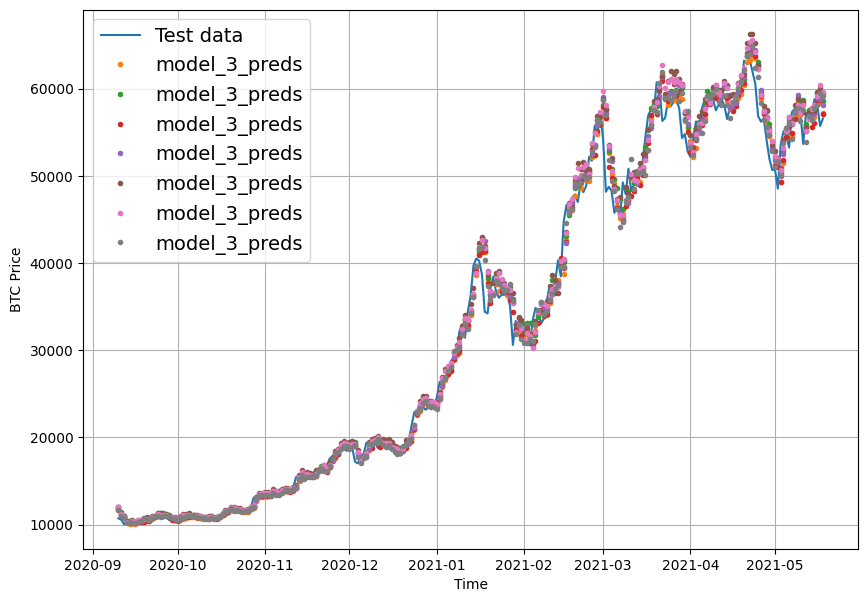

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

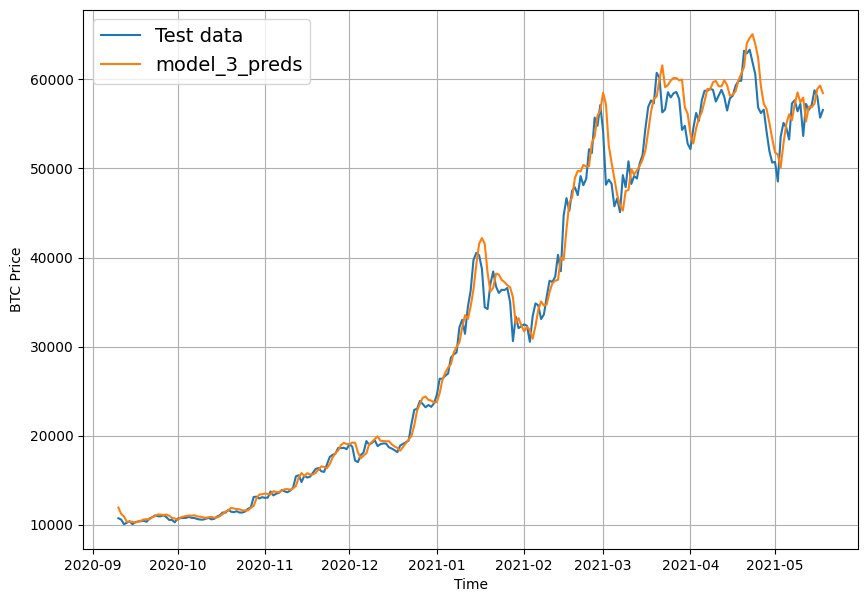

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

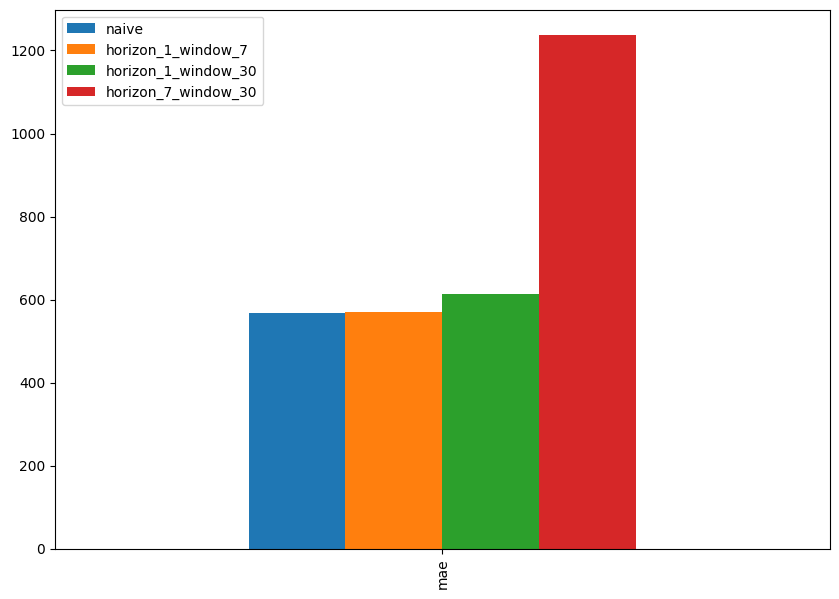

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4 : Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
full_windows ,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train and test set
train_windows, test_windows , train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels)

(2224, 2224)

To use the Conv1D layer, we need an input shape of : `(batch_size, timesteps, input_dims)`

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
 # Before we pass our data to the Conv1D layer we need to reshape it in order to make sure it works
 x = tf.constant(train_windows[0])
 x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))


In [ ]:
# Test out our lambda layer
print(f"Original shape : {x.shape}")
print(f"Expaanded shape : {expand_dims_layer(x).shape}")
print(f"Original values with expanded dims {expand_dims_layer(x)}")

Original shape : (7,)
Expaanded shape : (7, 1)
Original values with expanded dims [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# Create a Conv1D 
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON)
],name="model_4_conv1D")

model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())
model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2133.3213  

18/18 [==============================] - 6s 54ms/step - loss: 2038.8285 - val_loss: 3773.5251
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 333.4480

18/18 [==============================] - 1s 41ms/step - loss: 328.8472 - val_loss: 1052.8313
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 208.5498

18/18 [==============================] - 1s 48ms/step - loss: 208.5498 - val_loss: 1019.5161
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 187.6214

18/18 [==============================] - 1s 57ms/step - loss: 183.1772 - val_loss: 1003.5295
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 186.4042

18/18 [==============================] - 1s 57ms/step - loss: 178.2467 - val_loss: 988.5625
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 176.1329

18/18 [==============================] - 1s 58ms/step - loss: 176.1329 - val_loss: 985.4440
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 175.1830

18/18 [==============================] - 1s 41ms/step - loss: 175.1830 - val_loss: 955.8260
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 166.6382

18/18 [==============================] - 1s 42ms/step - loss: 169.6211 - val_loss: 942.7653
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 166.9664 - val_loss: 964.3467
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 163.7856

18/18 [==============================] - 1s 40ms/step - loss: 163.7856 - val_loss: 909.7723
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 160.4881

18/18 [==============================] - 1s 40ms/step - loss: 160.4881 - val_loss: 889.0643
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 158.4646 - val_loss: 944.4836
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 121.8575

18/18 [==============================] - 1s 39ms/step - loss: 155.8982 - val_loss: 874.9047
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 151.8872

18/18 [==============================] - 1s 39ms/step - loss: 151.8872 - val_loss: 871.6526
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 151.3877 - val_loss: 880.0656
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 139.7581

18/18 [==============================] - 1s 40ms/step - loss: 147.3141 - val_loss: 822.5740
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 145.1246

18/18 [==============================] - 1s 40ms/step - loss: 145.1246 - val_loss: 813.9496
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 142.1621 - val_loss: 821.4603
Epoch 19/100
12/18 [===================>..........] - ETA: 0s - loss: 144.9991

18/18 [==============================] - 1s 40ms/step - loss: 139.1433 - val_loss: 802.0635
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 138.0526

18/18 [==============================] - 1s 41ms/step - loss: 138.2851 - val_loss: 773.9008
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 137.7820

18/18 [==============================] - 1s 39ms/step - loss: 137.7820 - val_loss: 742.6328
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 136.2389

18/18 [==============================] - 1s 39ms/step - loss: 135.5162 - val_loss: 733.9623
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 131.3987

18/18 [==============================] - 1s 76ms/step - loss: 131.3987 - val_loss: 732.3835
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 131.8856

18/18 [==============================] - 1s 59ms/step - loss: 132.4139 - val_loss: 721.2332
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 141.2018

18/18 [==============================] - 1s 43ms/step - loss: 132.1668 - val_loss: 708.8297
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 127.2527

18/18 [==============================] - 1s 42ms/step - loss: 127.2527 - val_loss: 694.9243
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 126.3724

18/18 [==============================] - 1s 41ms/step - loss: 126.3724 - val_loss: 686.4001
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 124.5516 - val_loss: 689.8054
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 123.4360

18/18 [==============================] - 1s 40ms/step - loss: 123.4360 - val_loss: 685.3826
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 127.3294 - val_loss: 798.7938
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 135.3932 - val_loss: 753.6993
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 129.8966

18/18 [==============================] - 1s 40ms/step - loss: 129.8966 - val_loss: 655.7275
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 125.1687

18/18 [==============================] - 1s 41ms/step - loss: 125.1687 - val_loss: 655.3441
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 120.8970

18/18 [==============================] - 1s 41ms/step - loss: 120.8970 - val_loss: 646.3127
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 119.3549

18/18 [==============================] - 1s 41ms/step - loss: 119.1521 - val_loss: 643.9475
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 125.6457 - val_loss: 700.0728
Epoch 37/100
13/18 [====================>.........] - ETA: 0s - loss: 121.1434

18/18 [==============================] - 1s 42ms/step - loss: 119.7346 - val_loss: 637.6887
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 117.3835

18/18 [==============================] - 1s 60ms/step - loss: 117.1558 - val_loss: 631.5680
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3153 - val_loss: 707.7549
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 123.1534

18/18 [==============================] - 1s 41ms/step - loss: 117.6986 - val_loss: 630.6116
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 117.5935

18/18 [==============================] - 1s 40ms/step - loss: 116.8107 - val_loss: 622.5369
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 119.4909

18/18 [==============================] - 1s 41ms/step - loss: 119.4909 - val_loss: 619.7340
Epoch 43/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2333 - val_loss: 631.4613
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 116.5544 - val_loss: 649.2928
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 116.0550

18/18 [==============================] - 1s 57ms/step - loss: 118.4063 - val_loss: 618.2609
Epoch 46/100
13/18 [====================>.........] - ETA: 0s - loss: 117.7115

18/18 [==============================] - 1s 55ms/step - loss: 114.6569 - val_loss: 611.1767
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6173 - val_loss: 643.1292
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4583 - val_loss: 757.1769
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 118.6549 - val_loss: 639.4700
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 116.4565 - val_loss: 624.8626
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 113.1662

18/18 [==============================] - 1s 40ms/step - loss: 113.1662 - val_loss: 610.1270
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0722 - val_loss: 646.4861
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 116.5048

18/18 [==============================] - 1s 59ms/step - loss: 116.5048 - val_loss: 607.9153
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 112.3294 - val_loss: 622.7945
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 116.6159 - val_loss: 631.1008
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 121.0430 - val_loss: 765.4329
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 137.8537 - val_loss: 639.8157
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 113.9958 - val_loss: 622.6660
Epoch 59/100
 8/18 [============>.................] - ETA: 0s - loss: 104.8571

18/18 [==============================] - 1s 65ms/step - loss: 110.9444 - val_loss: 600.5549
Epoch 60/100
18/18 [==============================] - 0s 12ms/step - loss: 111.8636 - val_loss: 604.3910
Epoch 61/100
18/18 [==============================] - 0s 16ms/step - loss: 111.2948 - val_loss: 601.7717
Epoch 62/100
16/18 [=========================>....] - ETA: 0s - loss: 112.7116

18/18 [==============================] - 1s 61ms/step - loss: 110.6698 - val_loss: 590.2621
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8710 - val_loss: 597.3621
Epoch 64/100
18/18 [==============================] - 0s 13ms/step - loss: 112.0894 - val_loss: 663.5140
Epoch 65/100
18/18 [==============================] - 0s 14ms/step - loss: 117.4689 - val_loss: 606.2777
Epoch 66/100
 9/18 [==============>...............] - ETA: 0s - loss: 106.9935

18/18 [==============================] - 2s 111ms/step - loss: 112.4179 - val_loss: 588.4474
Epoch 67/100
18/18 [==============================] - 0s 9ms/step - loss: 111.7319 - val_loss: 636.9365
Epoch 68/100
18/18 [==============================] - 0s 13ms/step - loss: 116.5498 - val_loss: 661.9443
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 121.0015 - val_loss: 649.6528
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 120.7971 - val_loss: 591.1876
Epoch 71/100
18/18 [==============================] - 0s 12ms/step - loss: 111.5519 - val_loss: 616.7095
Epoch 72/100
10/18 [===============>..............] - ETA: 0s - loss: 110.9049

18/18 [==============================] - 2s 128ms/step - loss: 110.5210 - val_loss: 588.1258
Epoch 73/100
18/18 [==============================] - 1s 28ms/step - loss: 111.0968 - val_loss: 601.8134
Epoch 74/100
14/18 [======================>.......] - ETA: 0s - loss: 109.5606

18/18 [==============================] - 2s 95ms/step - loss: 110.0889 - val_loss: 584.6224
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4429 - val_loss: 595.9831
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 110.5563

18/18 [==============================] - 1s 42ms/step - loss: 110.5563 - val_loss: 583.0841
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 112.3812

18/18 [==============================] - 1s 41ms/step - loss: 111.4618 - val_loss: 580.4164
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6239 - val_loss: 587.5179
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1188 - val_loss: 603.1155
Epoch 80/100
16/18 [=========================>....] - ETA: 0s - loss: 110.0666

18/18 [==============================] - 1s 41ms/step - loss: 109.4091 - val_loss: 578.1715
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4791 - val_loss: 581.9613
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9072 - val_loss: 583.2803
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0265 - val_loss: 652.7642
Epoch 84/100
18/18 [==============================] - ETA: 0s - loss: 112.8686

18/18 [==============================] - 1s 40ms/step - loss: 112.8686 - val_loss: 576.3585
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3798 - val_loss: 586.5075
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5693 - val_loss: 660.3872
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2268 - val_loss: 617.2879
Epoch 88/100
16/18 [=========================>....] - ETA: 0s - loss: 111.6210

18/18 [==============================] - 1s 42ms/step - loss: 110.2923 - val_loss: 573.9924
Epoch 89/100
18/18 [==============================] - ETA: 0s - loss: 111.3238

18/18 [==============================] - 1s 41ms/step - loss: 111.3238 - val_loss: 573.8874
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5443 - val_loss: 649.7858
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3599 - val_loss: 599.5210
Epoch 92/100
18/18 [==============================] - ETA: 0s - loss: 110.3488

18/18 [==============================] - 1s 40ms/step - loss: 110.3488 - val_loss: 573.3842
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6878 - val_loss: 610.7873
Epoch 94/100
16/18 [=========================>....] - ETA: 0s - loss: 111.0029

18/18 [==============================] - 1s 40ms/step - loss: 109.5421 - val_loss: 572.0464
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3096 - val_loss: 590.7582
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3291 - val_loss: 590.8644
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7331 - val_loss: 627.7980
Epoch 98/100
18/18 [==============================] - ETA: 0s - loss: 110.0137

18/18 [==============================] - 1s 41ms/step - loss: 110.0137 - val_loss: 571.4185
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 109.1571

18/18 [==============================] - 1s 40ms/step - loss: 108.5428 - val_loss: 569.9161
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6236 - val_loss: 622.8846


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 622.8846


622.8845825195312

In [ ]:
#Load back in the best performing model
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows,test_labels)


18/18 [==============================] - 0s 4ms/step - loss: 569.9161


569.9161376953125

In [ ]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8882.585, 8771.327, 8979.978, 8786.792, 8744.209, 8731.811,
       8667.239, 8533.856, 8451.95 , 8506.659], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 569.9162,
 'mse': 1182968.1,
 'rmse': 1087.6433,
 'mape': 2.5708704,
 'mase': 1.0011849}

## Model 5 : RNN(LSTM)

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128 ,return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32,activation="relu")
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])


Epoch 1/100
18/18 [==============================] - 5s 139ms/step - loss: 2185.0234 - val_loss: 7612.8491
Epoch 2/100
18/18 [==============================] - 2s 103ms/step - loss: 498.4451 - val_loss: 2021.5461
Epoch 3/100
18/18 [==============================] - 2s 106ms/step - loss: 248.5723 - val_loss: 1362.7999
Epoch 4/100
18/18 [==============================] - 2s 120ms/step - loss: 195.6196 - val_loss: 1125.6517
Epoch 5/100
18/18 [==============================] - 5s 285ms/step - loss: 191.6337 - val_loss: 1079.0776
Epoch 6/100
18/18 [==============================] - 2s 102ms/step - loss: 189.0394 - val_loss: 1051.1187
Epoch 7/100
18/18 [==============================] - 2s 104ms/step - loss: 184.6624 - val_loss: 1009.3580
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 182.2385 - val_loss: 1190.4386
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 182.8513 - val_loss: 1169.4454
Epoch 10/100
18/18 [=============================

In [ ]:
#Load in best version of model 5
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 575.9275


575.927490234375

In [ ]:
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 3ms/step


In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_5_preds)
model_5_results

{'mae': 575.9275,
 'mse': 1201151.1,
 'rmse': 1095.9703,
 'mape': 2.6040065,
 'mase': 1.0117451}

## Make a multivariate time series dataset

one feature we could add is whether or not Daniel Bourke tweeted on that day..

What's better feature to use ?

how about the bitcoin halving events?

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_rewards_1 = 50 # 3 january 2009 - this block reward isn't in our datset
block_reward_2 = 25 # 28 november 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 May 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a blovk_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


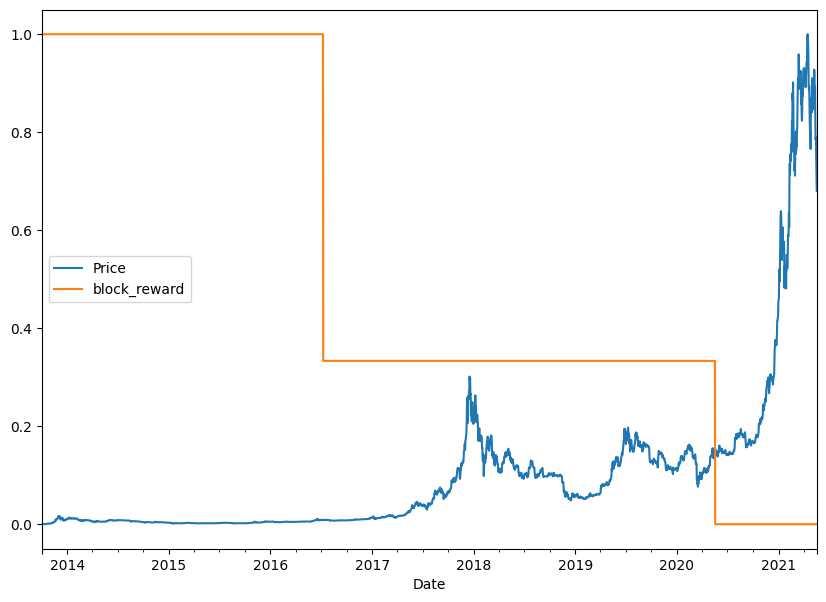

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7 

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

#Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)


bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe

In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
#Make train and test split
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6 : Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    #layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 16s - loss: 3637.5547

18/18 [==============================] - 2s 36ms/step - loss: 1922.3419 - val_loss: 2345.5327
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 321.2963

18/18 [==============================] - 1s 30ms/step - loss: 316.9810 - val_loss: 1352.3960
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 215.4514

18/18 [==============================] - 1s 31ms/step - loss: 213.6740 - val_loss: 1028.8550
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 236.4643

18/18 [==============================] - 0s 29ms/step - loss: 178.2683 - val_loss: 978.4337
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 179.4082

18/18 [==============================] - 1s 29ms/step - loss: 172.8018 - val_loss: 973.0800
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 126.9022

18/18 [==============================] - 1s 30ms/step - loss: 168.2724 - val_loss: 932.6247
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 207.9554

18/18 [==============================] - 1s 29ms/step - loss: 163.9570 - val_loss: 917.5150
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0514

18/18 [==============================] - 0s 28ms/step - loss: 161.7545 - val_loss: 897.2678
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 139.6131

18/18 [==============================] - 0s 27ms/step - loss: 156.6047 - val_loss: 895.0786
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 168.2638

18/18 [==============================] - 1s 47ms/step - loss: 153.1620 - val_loss: 856.6649
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 159.7897

18/18 [==============================] - 1s 31ms/step - loss: 149.5712 - val_loss: 829.9142
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 145.2616 - val_loss: 862.7145
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 117.8319

18/18 [==============================] - 1s 30ms/step - loss: 143.0008 - val_loss: 824.2525
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 144.7342

18/18 [==============================] - 1s 30ms/step - loss: 139.3849 - val_loss: 820.8257
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 137.5747

18/18 [==============================] - 1s 29ms/step - loss: 139.1373 - val_loss: 803.5505
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 122.8771

18/18 [==============================] - 0s 29ms/step - loss: 137.7164 - val_loss: 754.2283
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 121.9744

18/18 [==============================] - 0s 29ms/step - loss: 132.8789 - val_loss: 739.2891
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 130.0231 - val_loss: 747.2992
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 128.0809 - val_loss: 757.0906
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 135.3063

18/18 [==============================] - 1s 32ms/step - loss: 129.1135 - val_loss: 720.0233
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 167.4541

18/18 [==============================] - 1s 41ms/step - loss: 129.0327 - val_loss: 690.1576
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 128.0507

18/18 [==============================] - 1s 42ms/step - loss: 123.5018 - val_loss: 681.4379
Epoch 23/100
13/18 [====================>.........] - ETA: 0s - loss: 119.2227

18/18 [==============================] - 1s 43ms/step - loss: 122.1439 - val_loss: 679.4089
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 121.8422

18/18 [==============================] - 1s 33ms/step - loss: 120.6909 - val_loss: 663.7747
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 119.2815 - val_loss: 685.9555
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 125.2391 - val_loss: 732.6082
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 184.0560

18/18 [==============================] - 0s 29ms/step - loss: 123.6137 - val_loss: 663.5648
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 118.3746

18/18 [==============================] - 0s 28ms/step - loss: 117.6918 - val_loss: 638.4733
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 116.7191

18/18 [==============================] - 1s 29ms/step - loss: 116.5656 - val_loss: 635.1769
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 138.3886

18/18 [==============================] - 1s 29ms/step - loss: 116.9289 - val_loss: 630.5303
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1228 - val_loss: 707.7668
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 118.2319 - val_loss: 680.8193
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7317 - val_loss: 634.6295
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 143.1330

18/18 [==============================] - 1s 40ms/step - loss: 113.9701 - val_loss: 611.8993
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4354 - val_loss: 612.0720
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 161.2197

18/18 [==============================] - 1s 38ms/step - loss: 114.3369 - val_loss: 610.8664
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1238 - val_loss: 632.2579
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 114.8728

18/18 [==============================] - 1s 39ms/step - loss: 113.2096 - val_loss: 601.9111
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8348 - val_loss: 602.6765
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 106.4579

18/18 [==============================] - 1s 30ms/step - loss: 111.1571 - val_loss: 595.9324
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9010 - val_loss: 652.8502
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 108.2378

18/18 [==============================] - 1s 50ms/step - loss: 116.6620 - val_loss: 594.9028
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 89.2380

18/18 [==============================] - 1s 29ms/step - loss: 109.8241 - val_loss: 594.5118
Epoch 44/100
18/18 [==============================] - ETA: 0s - loss: 111.3300

18/18 [==============================] - 1s 29ms/step - loss: 111.3300 - val_loss: 592.5897
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0072 - val_loss: 592.8709
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 84.7467

18/18 [==============================] - 0s 29ms/step - loss: 110.3159 - val_loss: 592.0770
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 115.3862 - val_loss: 701.1246
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0169 - val_loss: 699.3005
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 185.6942

18/18 [==============================] - 1s 29ms/step - loss: 116.6473 - val_loss: 588.4570
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1736 - val_loss: 606.5626
Epoch 51/100
 1/18 [>.............................] - ETA: 0s - loss: 92.2919

18/18 [==============================] - 1s 50ms/step - loss: 109.4852 - val_loss: 586.4811
Epoch 52/100
14/18 [======================>.......] - ETA: 0s - loss: 113.6102

18/18 [==============================] - 2s 138ms/step - loss: 110.2475 - val_loss: 579.9875
Epoch 53/100
16/18 [=========================>....] - ETA: 0s - loss: 110.8852

18/18 [==============================] - 2s 110ms/step - loss: 111.7053 - val_loss: 579.2583
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 114.0717 - val_loss: 645.4812
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 110.6497 - val_loss: 579.7233
Epoch 56/100
18/18 [==============================] - 0s 9ms/step - loss: 109.1797 - val_loss: 775.8478
Epoch 57/100
18/18 [==============================] - 0s 12ms/step - loss: 124.1757 - val_loss: 676.8294
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 114.9338 - val_loss: 609.0023
Epoch 59/100
18/18 [==============================] - 0s 12ms/step - loss: 108.3413 - val_loss: 581.0906
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 108.8357 - val_loss: 584.0336
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 108.6494 - val_loss: 589.1948
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 10

18/18 [==============================] - 1s 60ms/step - loss: 108.2433 - val_loss: 575.4774
Epoch 63/100
18/18 [==============================] - 0s 18ms/step - loss: 108.5187 - val_loss: 595.6660
Epoch 64/100
18/18 [==============================] - 0s 11ms/step - loss: 109.0883 - val_loss: 664.6309
Epoch 65/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7770 - val_loss: 576.3159
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1246 - val_loss: 590.8374
Epoch 67/100
18/18 [==============================] - 0s 13ms/step - loss: 106.7661 - val_loss: 616.1291
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 113.7838 - val_loss: 707.1374
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 120.3939 - val_loss: 610.8965
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 121.4316 - val_loss: 596.0877
Epoch 71/100
18/18 [==============================] - 0s 13ms/step - loss

18/18 [==============================] - 1s 68ms/step - loss: 108.9995 - val_loss: 573.9238
Epoch 73/100
13/18 [====================>.........] - ETA: 0s - loss: 104.9147

18/18 [==============================] - 1s 67ms/step - loss: 106.0692 - val_loss: 569.8672
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 107.3855

18/18 [==============================] - 1s 76ms/step - loss: 107.5540 - val_loss: 569.4214
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 106.6379 - val_loss: 574.2545
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 109.8823

18/18 [==============================] - 1s 74ms/step - loss: 107.8059 - val_loss: 566.7941
Epoch 77/100
18/18 [==============================] - 0s 12ms/step - loss: 106.9685 - val_loss: 568.0707
Epoch 78/100
18/18 [==============================] - 0s 11ms/step - loss: 107.8986 - val_loss: 581.8621
Epoch 79/100
18/18 [==============================] - 0s 17ms/step - loss: 107.6155 - val_loss: 588.9744
Epoch 80/100
18/18 [==============================] - 0s 16ms/step - loss: 106.7060 - val_loss: 607.5422
Epoch 81/100
18/18 [==============================] - 0s 17ms/step - loss: 108.5813 - val_loss: 569.4130
Epoch 82/100
18/18 [==============================] - 0s 14ms/step - loss: 114.0606 - val_loss: 583.7644
Epoch 83/100
18/18 [==============================] - 0s 14ms/step - loss: 108.5429 - val_loss: 667.2658
Epoch 84/100
18/18 [==============================] - 0s 14ms/step - loss: 110.1872 - val_loss: 570.8540
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - 

18/18 [==============================] - 1s 64ms/step - loss: 109.3545 - val_loss: 564.4643
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 107.7305 - val_loss: 578.6407
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 110.1222 - val_loss: 564.8502
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7939 - val_loss: 677.6537
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0683 - val_loss: 603.5019
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2312 - val_loss: 580.1438
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5828 - val_loss: 593.4299
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2236 - val_loss: 584.8171
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9992 - val_loss: 564.6862
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 30ms/step - loss: 107.7517 - val_loss: 564.2303
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6989

18/18 [==============================] - 1s 29ms/step - loss: 107.5654 - val_loss: 563.6397
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 107.0440 - val_loss: 614.8843


In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 614.8844


614.8843994140625

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test,y_test)


18/18 [==============================] - 0s 2ms/step - loss: 563.6396


563.6396484375

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8839.736, 8786.868, 9026.948, 8787.672, 8743.895, 8686.077,
       8690.498, 8533.581, 8433.969, 8529.275], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 563.6396,
 'mse': 1149942.2,
 'rmse': 1072.3535,
 'mape': 2.5327997,
 'mase': 0.9901586}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7 : N-Beats algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing N-Beats Block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs): #the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)


    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


    # Block contains stack of 4 fully connect layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    #Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
      x = inputs
      for layer in self.hidden:
        x = layer(x)
      theta = self.theta_layer(x)
      #Output the backcast and the forecast from theta
      backcast, forecast = theta[:, :self.input_size], theta[:,-self.horizon:]
      return backcast, forecast
  

    


# Let's test our NBEATS class

In [ ]:
# setup dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummY_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE + HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4
    
)

In [ ]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsLayer
backcast, forecast = dummY_nbeats_block_layer(dummy_inputs)
# These are the actiavtion outputs of the theta layer (they'll random due to no training of the model)
print(f"dummy_inputs {tf.squeeze(dummy_inputs)}\n")
print(f"backcast {tf.squeeze(backcast)}\n")
print(f"forecast {tf.squeeze(forecast)}")


dummy_inputs [1 2 3 4 5 6 7]

backcast [-0.107915   -0.00529791  0.54025084 -0.5089925  -0.19165981 -0.6108844
 -0.03817081]

forecast 0.18649564683437347


### Preparing data for the N-Beats algorithm using `tf.data`

to make our input data as fast as possible we're going to use data pipeline in `tf.data` API

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7 

In [ ]:
# Create N-Beats data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train),len(y_train)

(2224, 2224)

In [ ]:
#Time to amke our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and feature by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

#Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-Beats algorithm

In [ ]:
# Values from N-Beats paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE


(7, 8)

### Getting ready for residual connections

Beofre we can craft out N-Beats model, we need two layers for the residual connections(substract and add)

In [ ]:
# Make tensors
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

substracted = layers.subtract([tensor_1,tensor_2])

added = layers.add([tensor_1,tensor_2])

print(f"Input Tensors : {tensor_1.numpy()} and {tensor_2.numpy()}")
print(f"Added : {added.numpy()}")
print(f"substracted : {substracted.numpy()}")

Input Tensors : [10 11 12 13 14 15 16 17 18 19] and [0 1 2 3 4 5 6 7 8 9]
Added : [10 12 14 16 18 20 22 24 26 28]
substracted : [10 10 10 10 10 10 10 10 10 10]


### Building , compiling and fitting the N-Beats algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
* Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
* Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [ ]:
tf.random.set_seed(42)
# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backset and forecast input
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS -1)):
  # 5. Use the NBeats to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals
  
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals,backcast], name=f"substract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. put the stack in model
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. fit the model with early stopping and ReduceLROnPlateau
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                             pateience=100,
                                                             verbose=1)
                       ])


Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 136: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 146: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 156: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 166: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 176: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 186: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 196: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 206: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.

Epoch 216: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.

Epoch 226: ReduceLROnPlateau reducing learning rate to 1.0000001179769417e-14.

Epoch 236: ReduceLROnPlateau reducing learning rate to 1.0000001518582595e-15.

Epoch 246: ReduceLROnPlateau reducing learnin

In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 21ms/step - loss: 663.8743


663.874267578125

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9129.032, 8966.589, 9019.474, 8901.219, 8854.102, 8820.221,
       8814.238, 8663.224, 8583.876, 8595.642], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_test,
                                 model_7_preds)
model_7_results

{'mae': 663.87427,
 'mse': 1519530.1,
 'rmse': 1232.6921,
 'mape': 3.0670378,
 'mase': 1.1662432}

In [ ]:
model_1_results

{'mae': 571.16376,
 'mse': 1177054.2,
 'rsme': 1084.9213,
 'mape': 2.5683558,
 'mase': 1.0033765}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rsme': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Plotting the N-BEATS architecture we've created

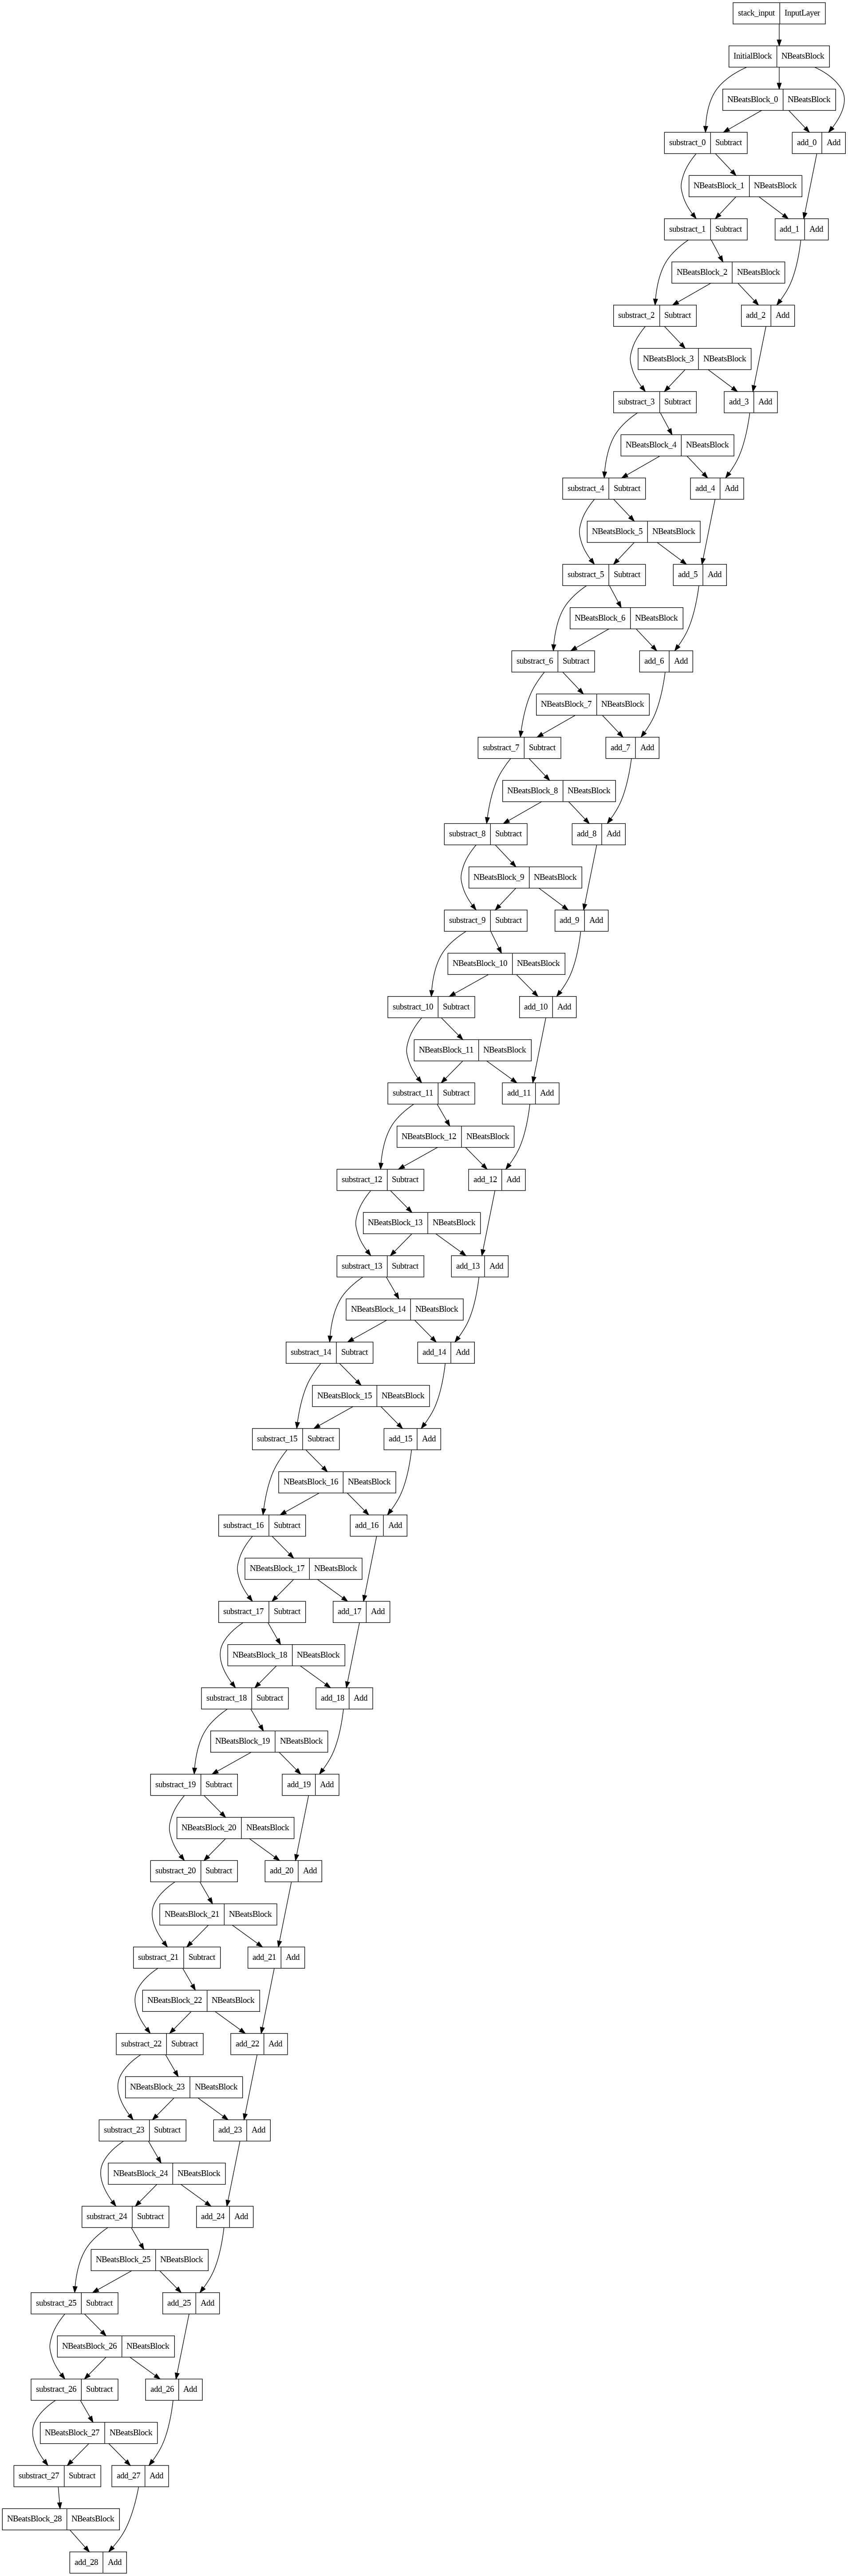

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

* An ensemble leverages the wisdom of the crowd effect.

* It combines many different models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 866: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 979: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 445: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 545: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 167: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 604: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 528: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 628: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [ ]:
### Make predictions with our ensemble model

ensemble_models

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 36ms/step
CPU times: user 675 ms, sys: 26.6 ms, total: 702 ms
Wall time: 813 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8803.578,  8874.829,  9076.38 , ..., 49747.594, 48408.266,
        45733.574],
       [ 8820.315,  8790.052,  9037.736, ..., 49741.336, 48433.21 ,
        45956.71 ],
       [ 8815.148,  8803.255,  9061.42 , ..., 50116.22 , 48325.87 ,
        46228.613],
       ...,
       [ 8841.059,  8830.485,  9081.218, ..., 50130.508, 48734.258,
        45887.656],
       [ 8731.139,  8780.13 ,  9083.258, ..., 49544.48 , 47989.18 ,
        45825.78 ],
       [ 8826.11 ,  8778.177,  9054.056, ..., 49716.805, 48262.91 ,
        45548.848]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8793.172, 8783.229, 9066.651, 8737.261, 8751.62 , 8726.765,
       8662.054, 8496.553, 8457.893, 8528.62 ], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8795.859, 8780.13 , 9064.678, 8722.956, 8752.578, 8740.498,
       8666.317, 8498.923, 8460.866, 8531.087], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 565.95386,
 'mse': 1141308.1,
 'rmse': 1068.3202,
 'mape': 2.5598335,
 'mase': 0.9942242}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 564.7801,
 'mse': 1140977.0,
 'rmse': 1068.1653,
 'mape': 2.5578096,
 'mase': 0.99216217}

In [ ]:

model_1_results

{'mae': 571.16376,
 'mse': 1177054.2,
 'rsme': 1084.9213,
 'mape': 2.5683558,
 'mase': 1.0033765}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)
* https://en.wikipedia.org/wiki/1.96
* https://eng.uber.com/neural-networks-uncertainty-estimation/


In [ ]:
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

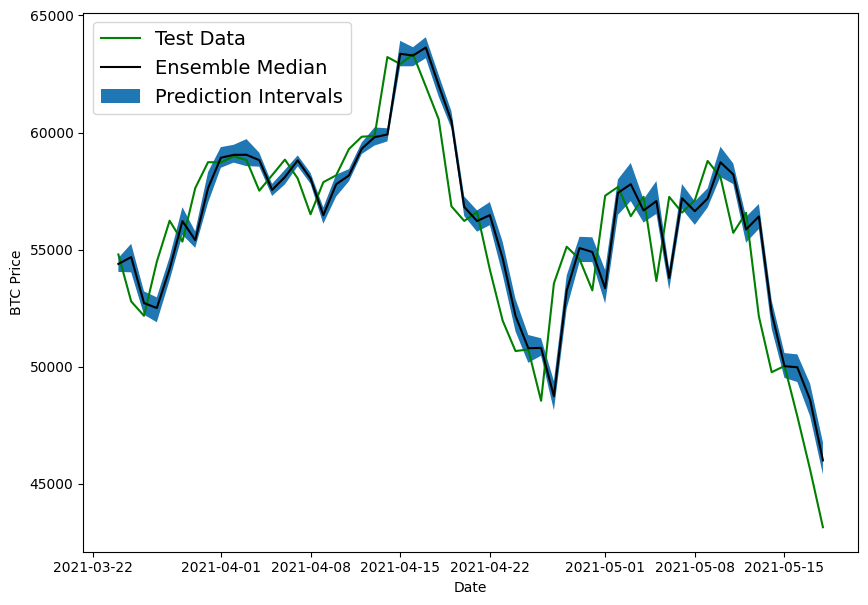

In [ ]:

# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Hmm...

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep.

🔑 Note: These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

### Aside: two types of uncertainty (coconut and subway)
Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:

1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)
There are two major types of uncertainty in machine learning you should know about:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty


Weve only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future
So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:

# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [ ]:
# How many timestesp to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
* a list of values (Bitcoin historical data)
* a trained model (such as model_9)
* a window into the future to predict (our INTO_FUTURE variable)
* the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last WINDOW_SIZE values from the input values
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE sequences which update to remove the first value and append the latest prediction

In [ ]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0)

<tf.Tensor: shape=(1, 7), dtype=float64, numpy=
array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361, 43144.47129086]])>

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

🛠 Exercise: In terms of a forecasting model, what might another approach to our make_future_forecasts() function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.

So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.

As it is, the make_future_forecasts() function skips the retraining of a model part.

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 83ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55934.66015625

1/1 [==============================] - 0s 34ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55934.66015625] -> Prediction: 50611.45703125

1/1 [==============================] - 0s 28ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55934.66015625 50611.45703125] -> Prediction: 48322.703125

1/1 [==============================] - 0s 28ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55934.66015625 50611.45703125 48322.703125  ] -> Prediction: 47593.8671875

1/1 [==============================] - 0s 40ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55934.66015625
 50611.45703125 48322.703125   47593.8671875 ]

### Plot future forecasts

In [ ]:
future_forecast

[55934.66,
 50611.457,
 48322.703,
 47593.867,
 48803.68,
 45351.797,
 47329.297,
 54003.914,
 49399.746,
 46726.28,
 47470.887,
 48977.97,
 46079.6,
 49084.223]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [ ]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55934.66 , 50611.457, 48322.703, 47593.867, 48803.68 ,
        45351.797, 47329.297, 54003.914, 49399.746, 46726.28 , 47470.887,
        48977.97 , 46079.6  , 49084.223], dtype=float32))

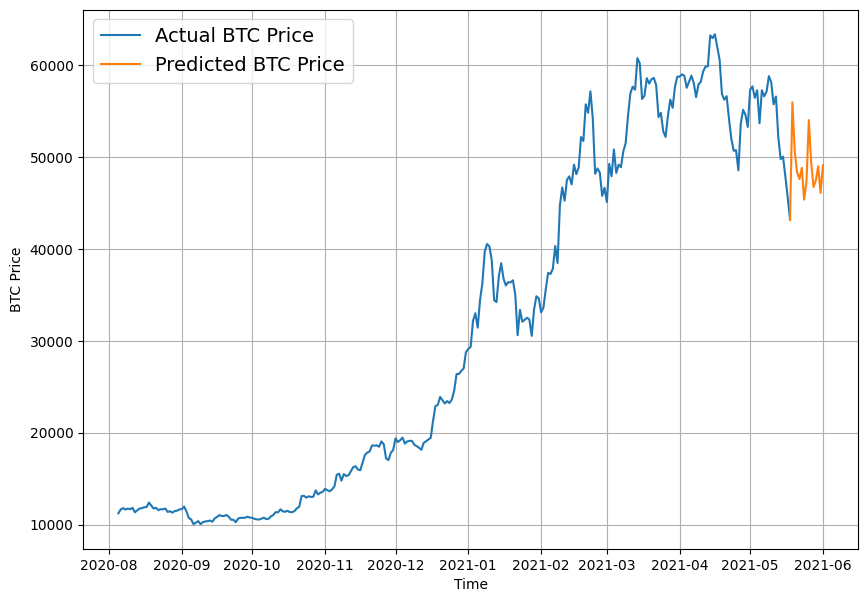

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [ ]:
# Let's introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:

# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

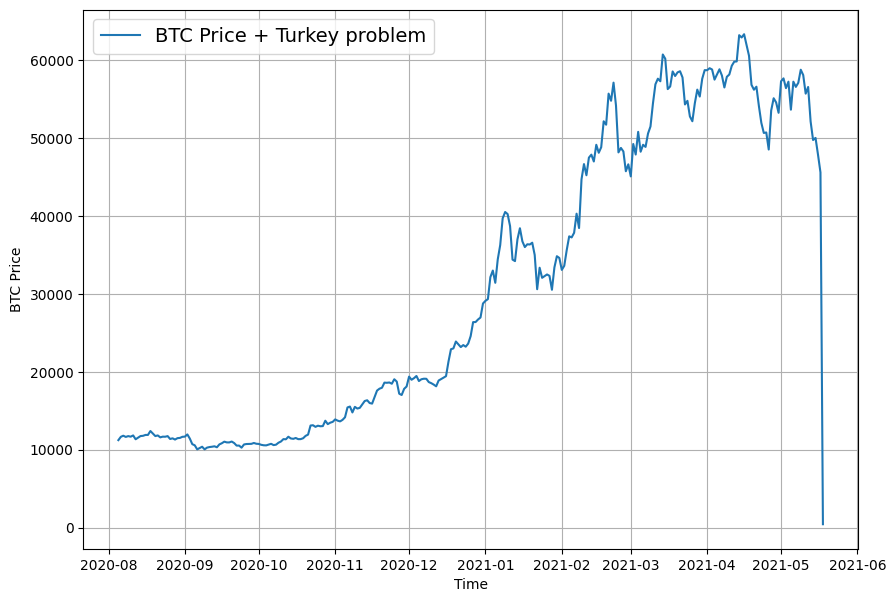

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 659.8557


659.8556518554688

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 641.3170


641.3169555664062

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8848.218, 8776.4  , 9040.701, 8783.762, 8737.107, 8746.017,
       8671.501, 8527.933, 8458.25 , 8529.244], dtype=float32)>

In [ ]:

# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17121.46,
 'mse': 613831200.0,
 'rmse': 23698.408,
 'mape': 121.25444,
 'mase': 26.495516}

In [ ]:
model_1_results

{'mae': 571.16376,
 'mse': 1177054.2,
 'rsme': 1084.9213,
 'mape': 2.5683558,
 'mase': 1.0033765}

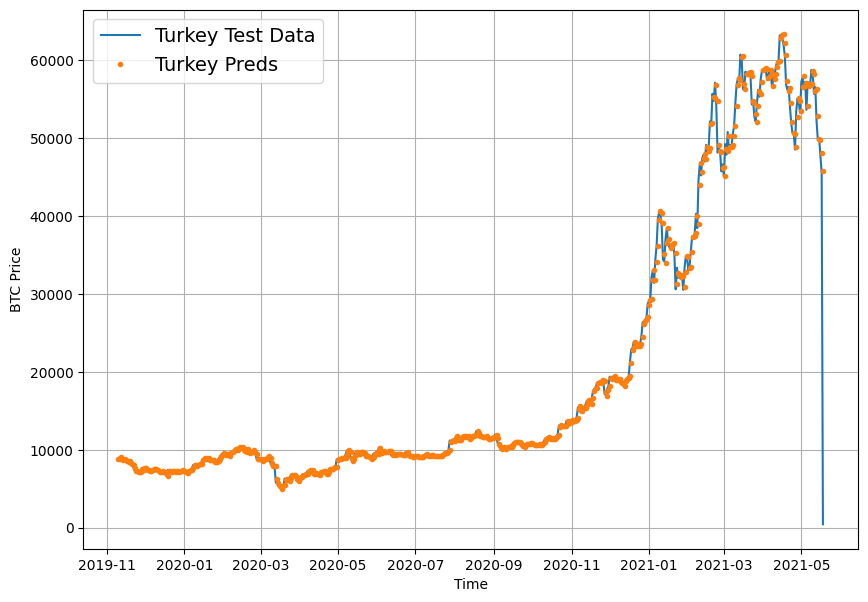

In [ ]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

### Compare models

In [ ]:
ensemble_results

{'mae': 564.7801,
 'mse': 1140977.0,
 'rmse': 1068.1653,
 'mape': 2.5578096,
 'mase': 0.99216217}

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rsme,mape,mase,rmse
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570,NaN
model_1_dense_w7_h1,571.163757,1.177054e+06,1084.921265,2.568356,1.003376,NaN
model_2_dense_w30_h1,613.487488,1.284892e+06,1133.530762,2.775635,1.072382,NaN
model_3_dense_w30_h7,1236.515869,5.416353e+06,NaN,5.581712,2.200311,1425.407471
model_4_CONV1D,569.916199,1.182968e+06,NaN,2.570870,1.001185,1087.643311
model_5_LSTM,575.927490,1.201151e+06,NaN,2.604007,1.011745,1095.970337
model_6_multivariate,563.639587,1.149942e+06,NaN,2.532800,0.990159,1072.353516
model_7_NBEATS,663.874268,1.519530e+06,NaN,3.067038,1.166243,1232.692139
model_8_ensemble,564.780090,1.140977e+06,NaN,2.557810,0.992162,1068.165283
model_10_turkey,17121.460938,6.138312e+08,NaN,121.254440,26.495516,23698.408203


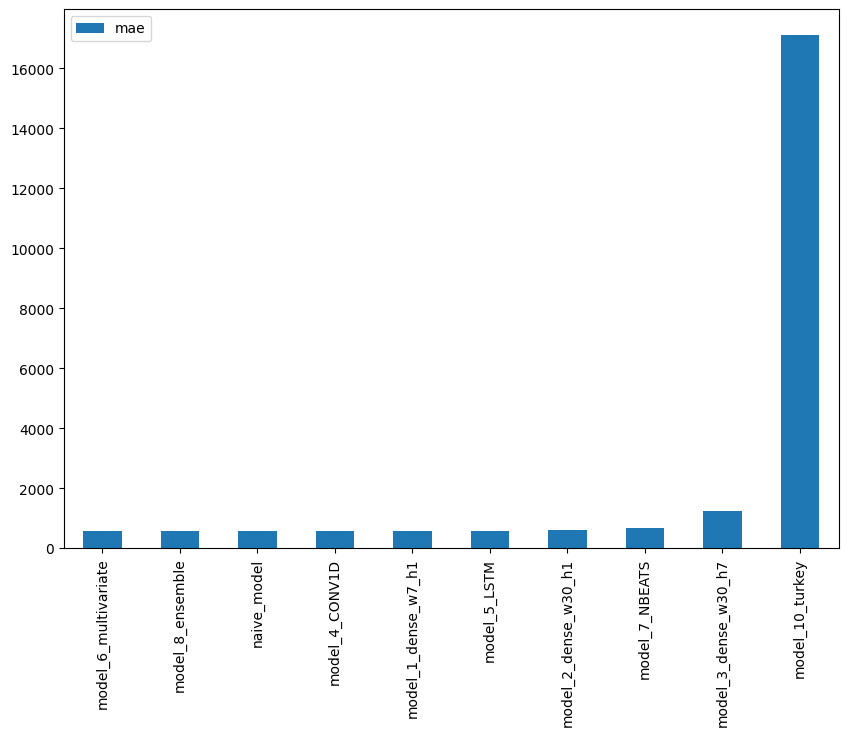

In [ ]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");